In [1]:
%pip install seaborn
%pip install plotly

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
df = pd.read_csv("Fast Food Sales Report.csv")
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,7/3/2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,2/3/2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10/2/2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [4]:
df.shape
df.info()
print("df.shape : ", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB
df.shape :  (1000, 10)


In [5]:
df['transaction_type'].value_counts(normalize=True).round(2)

transaction_type
Cash      0.53
Online    0.47
Name: proportion, dtype: float64

In [6]:
df['time_of_sale'].unique()

array(['Night', 'Afternoon', 'Evening', 'Morning', 'Midnight'],
      dtype=object)

In [7]:
df.drop(columns = ['order_id'], inplace=True)
df.head(3)

,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,7/3/2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon


In [8]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,2022-07-03,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,2023-02-03,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,2022-10-02,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [9]:
# Monthly Sales
monthly_sales = df.groupby(df['date'].dt.to_period('M'))['transaction_amount'].sum()
monthly_sales.head(12)

date
2022-04    17670
2022-05    26570
2022-06    17335
2022-07    19490
2022-08    22305
2022-09    18640
2022-10    27205
2022-11    22900
2022-12    23460
2023-01    28670
2023-02    25595
2023-03    25390
Freq: M, Name: transaction_amount, dtype: int64

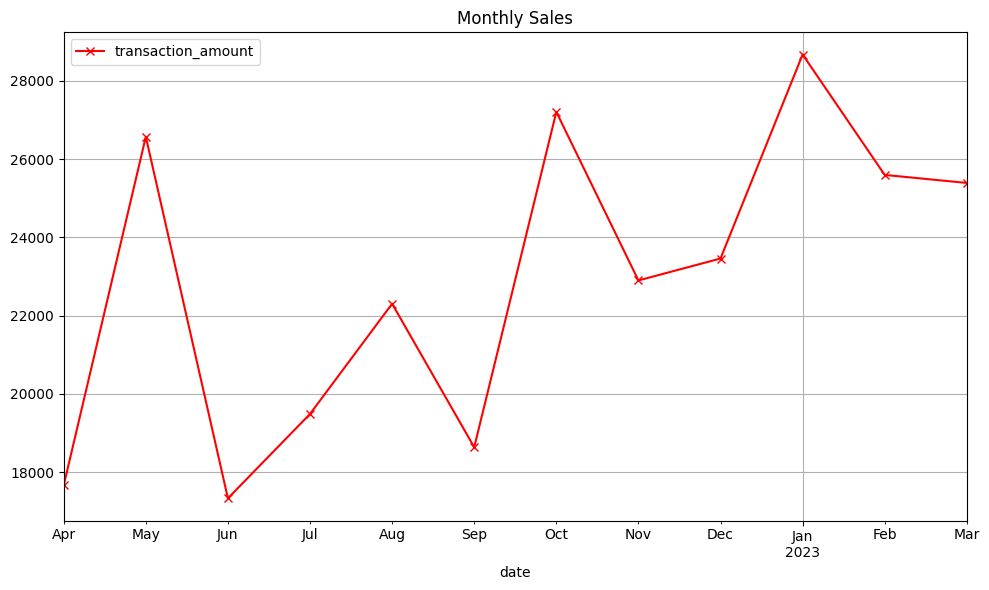

In [10]:
# Monthly Sales
plt.figure(figsize=(10,6))

monthly_sales.plot(title = 'Monthly Sales', marker = 'x',color = 'red',label='transaction_amount')

plt.grid(True)
plt.legend()
plt.tight_layout()

In [11]:
df['Month'] = df['date'].dt.month

highest_month_items = df.groupby(['item_name'])['quantity'].sum().sort_values(ascending =False)
highest_month_items

item_name
Cold coffee        1361
Sugarcane juice    1278
Panipuri           1226
Frankie            1150
Sandwich           1097
Aalopuri           1044
Vadapav            1006
Name: quantity, dtype: int64

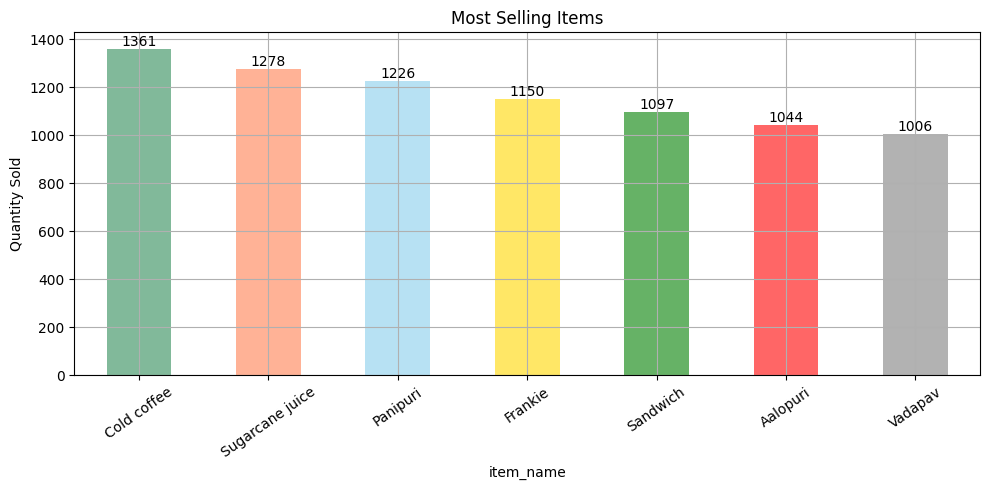

In [12]:
plt.figure(figsize=(10,5))

colors = ['seagreen', 'coral', 'skyblue', 'gold', 'green','red','grey']
highest_month_items.plot(kind = 'bar', color =colors[:len(highest_month_items)], alpha = 0.6)
handles = [plt.Rectangle((0,0),1,1, color = color) for color in colors[:len(highest_month_items)]]
labels = highest_month_items.index.tolist()  # Use item names as labels
for i, v in enumerate(highest_month_items):
     plt.annotate(str(v),xy =(i,v), ha='center',va='bottom')
    
#plt.legend(handles,labels, title='Items')
plt.xticks(rotation = 35)
plt.grid(True)
plt.ylabel('Quantity Sold')
plt.title('Most Selling Items')
plt.tight_layout()  # Adjust layout to prevent clipping of ylabel

In [13]:
transaction_type = df.groupby(df['transaction_type'])['transaction_amount'].sum()
transaction_type

transaction_type
Cash      132840
Online    110595
Name: transaction_amount, dtype: int64

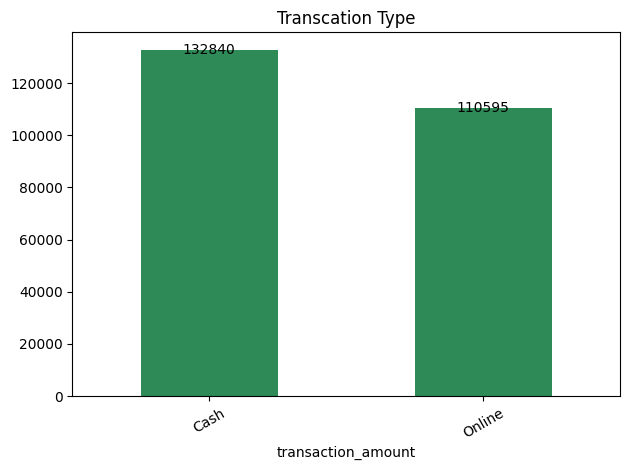

In [14]:
transaction_type.plot(kind = 'bar', color = 'seagreen')
for i,v in enumerate(transaction_type):
    plt.annotate(str(v), xy= (i,v), va='center', ha= 'center')
plt.xlabel('transaction_amount')
plt.title('Transcation Type')
plt.xticks(rotation=30)
plt.tight_layout()

In [15]:
Segmentation = df.groupby(df['received_by'])['transaction_amount'].sum()
Segmentation


received_by
Mr.     143440
Mrs.    131790
Name: transaction_amount, dtype: int64

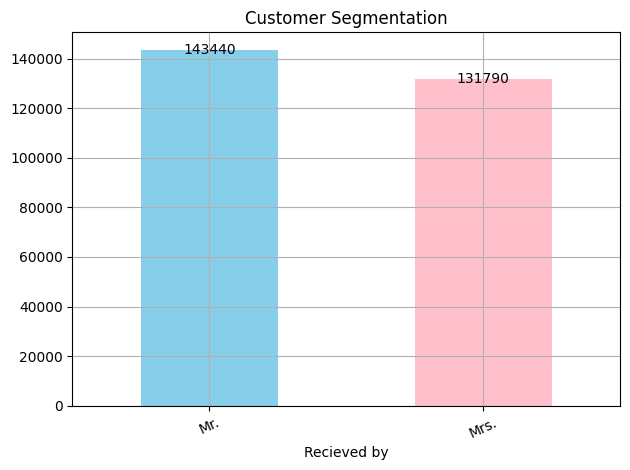

In [16]:
# Recieved by
Segmentation.plot(kind = 'bar', color = ['skyblue','pink'])
for i,v in enumerate(Segmentation):
    plt.annotate(str(v), xy= (i,v), va='center', ha= 'center')
plt.xlabel('Recieved by')
plt.title('Customer Segmentation')
plt.grid(True)
plt.xticks(rotation=25)
plt.tight_layout()

In [17]:
time_of_sale = df.groupby(df['time_of_sale'])['transaction_amount'].sum().sort_values()
time_of_sale

time_of_sale
Midnight     50725
Evening      52355
Morning      53730
Afternoon    56345
Night        62075
Name: transaction_amount, dtype: int64

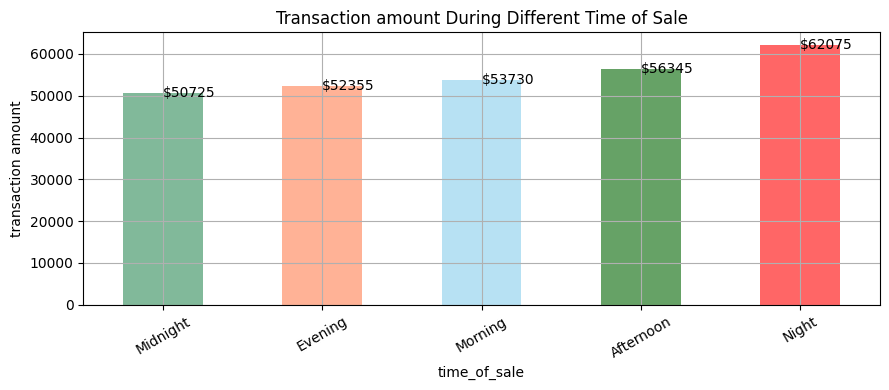

In [18]:
#Transaction amount During Different Time of Sale
plt.figure(figsize=(9,4))

colors = ['seagreen', 'coral', 'skyblue', 'darkgreen','red','grey']
time_of_sale.plot(kind = 'bar',  color = colors[:len(time_of_sale)], alpha = 0.6)
handles = [plt.Rectangle((0,0),1,1,color = color) for color in colors[:len(time_of_sale)]]
labels = time_of_sale.index.to_list()  # Use item names as labels
for i, v in enumerate(time_of_sale):
    plt.annotate(f'${v}', xy = (i,v), va ='center',ha = 'left')
plt.ylabel('transaction amount')
plt.xticks(rotation = 30)
plt.grid(True)

plt.title('Transaction amount During Different Time of Sale')
plt.tight_layout()

In [19]:
df.head()

,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,Month
0,2022-07-03,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night,7
1,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon,8
2,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon,11
3,2023-02-03,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night,2
4,2022-10-02,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening,10


In [20]:
Food_vs_Beverages = df.groupby(['item_type'])['quantity'].sum()
Food_vs_Beverages

item_type
Beverages    2639
Fastfood     5523
Name: quantity, dtype: int64

In [21]:
Total_Sales_bytype = df.groupby(['item_type'])['transaction_amount'].sum()
print(Total_Sales_bytype)

item_type
Beverages     86390
Fastfood     188840
Name: transaction_amount, dtype: int64


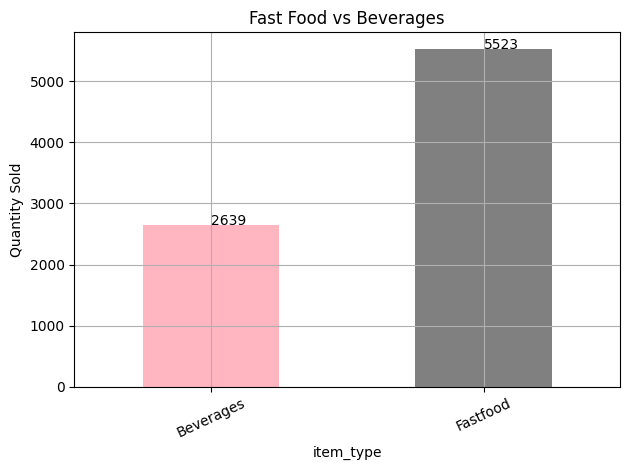

In [22]:
#Fast Food vs Beverages
colors = ['lightpink', 'grey']
Food_vs_Beverages.plot(kind = 'bar', color = colors[:len (Food_vs_Beverages)])
for i, v in enumerate(Food_vs_Beverages):
    plt.annotate(str(v), xy = (i,v))
plt.xticks(rotation = 25)
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.title('Fast Food vs Beverages')
plt.tight_layout()

In [23]:
avg_prices = df.groupby('item_name')['item_price'].mean()
print(avg_prices)

item_name
Aalopuri           20.0
Cold coffee        40.0
Frankie            50.0
Panipuri           20.0
Sandwich           60.0
Sugarcane juice    25.0
Vadapav            20.0
Name: item_price, dtype: float64


In [24]:
top_prices = avg_prices.sort_values(ascending=False).head()
top_prices

item_name
Sandwich           60.0
Frankie            50.0
Cold coffee        40.0
Sugarcane juice    25.0
Aalopuri           20.0
Name: item_price, dtype: float64

Text(0.5, 1.0, 'Top Prices')

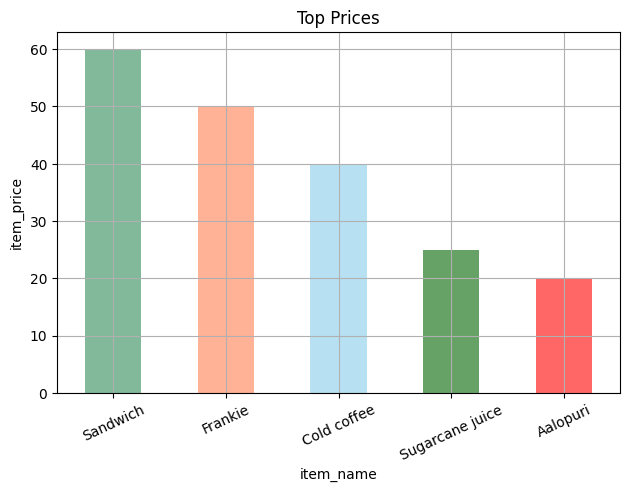

In [25]:
colors = ['seagreen', 'coral', 'skyblue', 'darkgreen','red']
top_prices.plot(kind = 'bar', color = colors, alpha = 0.6)
plt.ylabel('item_price')
plt.xticks(rotation = 25)
plt.tight_layout()
plt.grid(True)
plt.title('Top Prices')

In [26]:
bottom_prices = avg_prices.sort_values().tail()
bottom_prices

item_name
Vadapav            20.0
Sugarcane juice    25.0
Cold coffee        40.0
Frankie            50.0
Sandwich           60.0
Name: item_price, dtype: float64

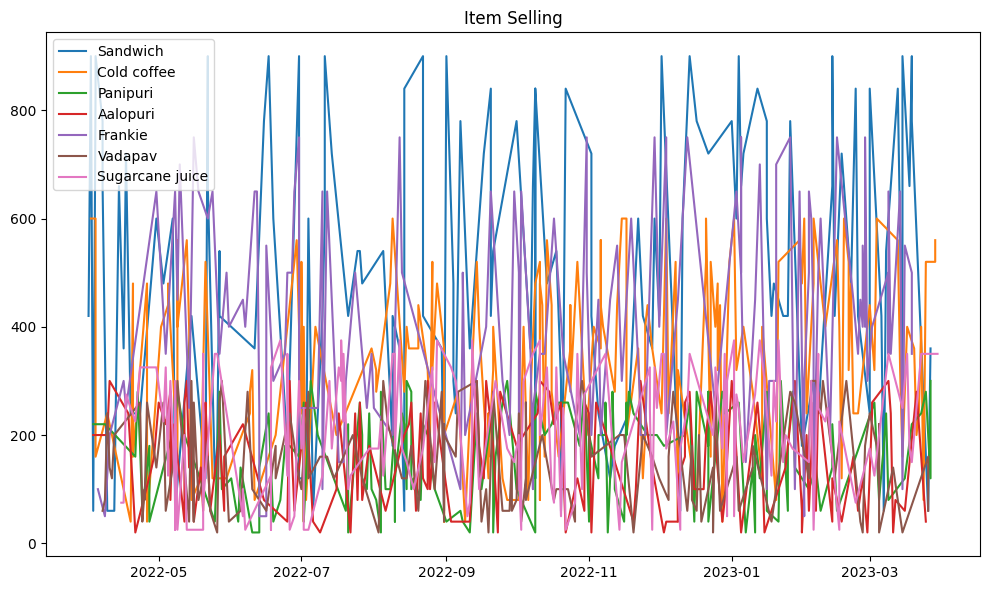

In [27]:
plt.figure(figsize=(10,6))
#setting items 
df = df.sort_values('date')


items = df['item_name'].unique()
for item in items:
    item_data = df[df['item_name'] == item]
    plt.plot(item_data['date'], item_data['transaction_amount'], label = item)

plt.title('Item Selling')
plt.legend()
plt.tight_layout()